## Content Based Sorting Using Convolutional Neural Network

In [1]:
from __future__ import print_function
import time
from PIL import Image
import numpy as np
import glob
from keras import backend
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

Using TensorFlow backend.


In [2]:
path2im = '/home/rey/Github/content_sort/'
album = ['art/','mountain/','person/','beach/','friends_family/']
feature_avg = [np.zeros((1,7,7,512)) for i in xrange(0,len(album))]
model = VGG16(weights='imagenet',include_top=False)

## Train based on current albums

In [3]:
for j in xrange(len(album)):
    c = 0.0
    for file in glob.glob(path2im+album[j]+'*.jpg'):
        im = Image.open(file)
        im = im.resize((224,224))
        mat = np.asarray(im, dtype='float32')
        mat = np.expand_dims(im, axis=0)
        mat.setflags(write=1)
        mat = np.float64(mat)
        mat = preprocess_input(mat)
        feature = model.predict(mat)
        feature_avg[j] += feature
        c += 1.0
    feature_avg[j] = feature_avg[j]/c

## Predict one image that is not in the album

Prediction: art/


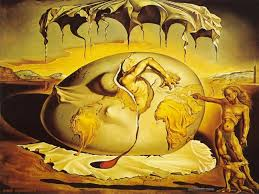

In [11]:
im = path2im + 'test_images/dali.jpg'
im = full_res = Image.open(im)
im = im.resize((224, 224))

feature = np.asarray(im, dtype='float32')
feature = np.expand_dims(feature, axis=0)
feature = preprocess_input(feature)
preds = model.predict(feature)

loss = [np.mean(pow((preds-feature_avg[i]),2)) for i in xrange(0,len(album))]

prediction = album[np.argmin(loss)]
print('Prediction: %s' % prediction)
full_res

## Predict all images that are not in the album

In [8]:
for file in glob.glob(path2im+'test_images/'+'*.jpg'):
    im = Image.open(file)
    im = im.resize((224, 224))
    feature = np.asarray(im, dtype='float32')
    feature = np.expand_dims(feature, axis=0)
    feature = preprocess_input(feature)
    preds = model.predict(feature)
    loss = [np.mean(pow((preds-feature_avg[i]),2)) for i in xrange(0,len(album))]
    prediction = album[np.argmin(loss)]
    print('%s --Prediction:%s' % (file[42:],prediction))

fam2.jpg --Prediction:friends_family/
jokowi.jpg --Prediction:person/
art1.jpg --Prediction:art/
fam.jpg --Prediction:friends_family/
barujari.jpg --Prediction:mountain/
wolverine.jpg --Prediction:person/
ampat.jpg --Prediction:beach/
prom2.jpg --Prediction:friends_family/
grad.jpg --Prediction:friends_family/
fuji.jpg --Prediction:mountain/
art2.jpg --Prediction:art/
paint.jpg --Prediction:art/
fnf1.jpg --Prediction:friends_family/
yosemite.jpg --Prediction:mountain/
prom.jpg --Prediction:friends_family/
fam3.jpg --Prediction:friends_family/
obama.jpg --Prediction:person/
oscar.jpg --Prediction:friends_family/
bali.jpg --Prediction:beach/
yosemite2.jpg --Prediction:mountain/
yosemite3.jpg --Prediction:mountain/
kilimanjaro.jpg --Prediction:mountain/
bromo.jpg --Prediction:mountain/
dali.jpg --Prediction:art/
everest.jpg --Prediction:mountain/
picasso.jpg --Prediction:art/
fnf2.jpg --Prediction:friends_family/
art5.jpg --Prediction:art/
ptreyes.jpg --Prediction:beach/
art4.jpg --Predic